# Student Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

class StudentDataset: 
    def __init__(self, num_students: int, seed: int):
        """Initialize the dataset with a specified number of students and a random seed."""
        self.num_students = num_students
        self.rng = np.random.default_rng(seed)
        self.df = self.assemble_dataframe()

    def generate_gender(self) -> list[str]:
        """Generate random genders for students based on predefined probabilities."""
        genders = ['Male', 'Female', 'Other']
        probabilities = [0.65, 0.33, 0.02]
        return self.rng.choice(genders, size=self.num_students, p=probabilities).tolist()

    def generate_major(self) -> list[str]:
        """Generate random majors for students based on predefined probabilities."""
        majors = ["B.Tech", "MS", "PhD"]
        probabilities = [0.7, 0.2, 0.1]
        return self.rng.choice(majors, size=self.num_students, p=probabilities).tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        """Generate random programs based on the student's major."""
        programs = []
        for major in majors:
            if major == "B.Tech":
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p = [0.4, 0.4, 0.1, 0.1]))
            elif major == "MS":
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p = [0.3, 0.3, 0.2, 0.2]))
            elif major == "PhD":
                programs.append(self.rng.choice(["CSE", "ECE", "CHD", "CND"], p = [0.25, 0.25, 0.25, 0.25]))
            
        return programs
    
    def generate_gpa(self, majors: list[str]) -> list[float]:
        """Generate GPA values (clipped between 4 and 10) based on the student's major using Gaussian distributions."""
        gpas = []
        for major in majors:
            if major == "B.Tech":
                gpa = self.rng.normal(7.0, 1.0)
            elif major == "MS":
                gpa = self.rng.normal(8.0, 0.7)
            elif major == "PhD":
                gpa = self.rng.normal(8.3, 0.5)

            gpas.append(np.clip(gpa, 4.0, 10.0))
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        """Assemble the full student dataset into a Pandas DataFrame."""
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)

        df = pd.DataFrame({
            "gender": self.generate_gender(),
            "major": majors,
            "program": programs,    
            "GPA": gpas
        })
        return df

    def get_full_dataframe(self) -> pd.DataFrame:
        """Return the full dataset as a Pandas DataFrame."""
        return self.df
    
    #Q1.1 Dataset Analysis
    #(a) Visualization
    def plot_gender_distribution(self) -> None:
        plt.figure(figsize=(16, 6))
        sns.countplot(x= 'gender', data=self.df)
        plt.title('Gender Distribution')
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )

        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.show()
    
    def plot_major_distribution(self) -> None:
        plt.figure(figsize=(16, 6))
        sns.countplot(x= 'major', data=self.df)
        plt.title('Major Distribution')
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )

        plt.xlabel('Major')
        plt.ylabel('Count')
        plt.show()

    def plot_program_distribution(self) -> None:
        plt.figure(figsize=(16, 6))
        sns.countplot(x= 'program', data=self.df)
        plt.title('Program Distribution')
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )

        plt.xlabel('Program')
        plt.ylabel('Count')
        plt.show()

    def plot_gpa_distribution(self, bins: int = 20) -> None:
        plt.figure(figsize=(16, 6))
        sns.histplot(self.df['GPA'], bins=bins, kde=True)
        plt.title('GPA Distribution')
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )

        plt.xlabel('GPA')
        plt.ylabel('Frequency')
        plt.show()

    def plot_program_by_major(self) -> None:
        plt.figure(figsize=(16, 6))
        sns.countplot(x='program', hue='major', data=self.df)
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.title("Program Distribution by Major")
        plt.xlabel("Program")
        plt.ylabel("Count")
        plt.legend(title='Major')
        plt.show()

    def plot_gpa_by_major(self) -> None:
        plt.figure(figsize=(16, 6))
        sns.boxplot(x="major", y="GPA", data=self.df)
        plt.title("GPA by Major")
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.xlabel("Major")
        plt.ylabel("GPA")
        plt.show()

    def plot_gpa_by_program(self) -> None:
        plt.figure(figsize=(16, 6))
        sns.boxplot(x="program", y="GPA", data=self.df)
        plt.title("GPA by Program")
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.xlabel("Program")
        plt.ylabel("GPA")
        plt.show()

    def plot_gpa_by_program_and_major(self) -> None:
        plt.figure(figsize=(16, 6))
        sns.boxplot(x="program", y="GPA", hue="major", data=self.df)
        plt.title("GPA by Program and Major")
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.xlabel("Program")
        plt.ylabel("GPA")
        plt.legend(title="Major")
        plt.show()

    

    def plot_sampled_dataset(self, sample_size: int = 100) -> None:
        """
        Plots a pairplot for a random sample of the dataset.
        Converts categorical variables into numeric codes for visualization.
        """
        # Sample dataset
        sampled_df = self.df.sample(n=sample_size, random_state=self.rng)

        # Convert categorical columns to numeric codes
        sampled_df = sampled_df.copy()
        sampled_df["major_code"] = sampled_df["major"].astype("category").cat.codes
        sampled_df["program_code"] = sampled_df["program"].astype("category").cat.codes

        plot_df = sampled_df[["GPA", "major_code", "program_code", "gender"]]

        sns.pairplot(plot_df, diag_kind="kde", hue="gender")
        plt.suptitle("Pairplot of Sampled Dataset", y=1.02)
        plt.show()


    def plot_entire_dataset_summary(self, sample_size: int = 2000) -> None:
        """
        Plots a pairplot for a larger subset of the dataset.
        Converts categorical variables into numeric codes for visualization.
        """
        # Sample dataset
        sampled_df = self.df.sample(n=sample_size, random_state=self.rng)

        # Convert categorical columns to numeric codes
        sampled_df = sampled_df.copy()
        sampled_df["major_code"] = sampled_df["major"].astype("category").cat.codes
        sampled_df["program_code"] = sampled_df["program"].astype("category").cat.codes

        plot_df = sampled_df[["GPA", "major_code", "program_code", "gender"]]

        sns.pairplot(plot_df, diag_kind="kde", hue="gender")
        plt.suptitle("Pairplot of Entire Dataset Summary", y=1.02)
        plt.show()

    
    #(b) GPA Summary Function
    def gpa_mean_std(self) -> tuple[float, float]:
        """Calculate mean and standard deviation of GPA."""
        return (self.df["GPA"].mean(), self.df["GPA"].std())
    
    #(c) Program-Major Combinations
    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """Count number of students for each (program, major) combination."""
        return self.df.groupby(["program", "major"]).size().unstack(fill_value=0)

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
        """Visualize student counts per (program, major) pair using a heatmap."""
        plt.figure(figsize=(10, 8))
        sns.heatmap(counts_df, annot=True, fmt="d", cmap="Blues")
        plt.title("Students per Program-Major Pair")
        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.xlabel("Major")
        plt.ylabel("Program")
        plt.show()
    
    #Q1.2
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """Calculate mean and standard deviation of GPA using simple random sampling."""
        means = []
        for _ in range(repeats):
            sample = self.df.sample(
                n=n, random_state=int(self.rng.integers(0, 2**32))
            )
            means.append(sample["GPA"].mean())

        return (np.mean(means), np.std(means, ddof=1))


    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """Calculate mean and standard deviation of GPA using stratified sampling by major."""
        means = []
        major_proportions = self.df["major"].value_counts(normalize=True)
        
        for _ in range(repeats):
            stratified_samples = []
            
            for major, frac in major_proportions.items():
                major_df = self.df[self.df["major"] == major]
                n_major = int(round(n * frac))
                
                if n_major > 0:
                    sample = major_df.sample(
                        n=min(n_major, len(major_df)),
                        random_state=int(self.rng.integers(0, 2**32))
                    )
                    stratified_samples.append(sample)
            
            combined_sample = pd.concat(stratified_samples, ignore_index=True)
            means.append(combined_sample["GPA"].mean())

        return (np.mean(means), np.std(means, ddof=1))

    #Q1.3 
    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Sample students ensuring balanced gender counts."""
        genders = ['Male', 'Female', 'Other']
        results = []
        per_gender = n // len(genders)

        for _ in range(repeats):
            sampled_parts = []

            for g in genders:
                gender_df = self.df[self.df['gender'] == g]

                if len(gender_df) < per_gender:
                    raise ValueError(f"Not enough samples for gender: {g}")

                sampled_gender_df = gender_df.sample(
                    n=per_gender,
                    random_state=self.rng.integers(0, 2**32)
                )
                sampled_parts.append(sampled_gender_df)

            sampled_df = pd.concat(sampled_parts)
            counts = sampled_df['gender'].value_counts().to_dict()

            for g in genders:
                counts.setdefault(g, 0)

            results.append(counts)

        return results


                
    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Sample students uniformly at random by gender."""
        genders = ['Male', 'Female', 'Other']

        results = []
        for _ in range(repeats):
            gender_counts = {'Male': 0, 'Female': 0, 'Other': 0}
            
            for _ in range(n):
                selected_gender = self.rng.choice(genders)
                gender_subset = self.df[self.df['gender'] == selected_gender]
                
                if len(gender_subset) > 0:
                    sampled_student = gender_subset.sample(n=1, random_state=self.rng.integers(0, 2**32))
                    gender_counts[selected_gender] += 1
            
            results.append(gender_counts)

        return results
    

    #Q1.4
    def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
        """Sample students uniformly based on GPA bins."""
        gpa_bins = np.linspace(self.df['GPA'].min(), self.df['GPA'].max(), bins + 1)
        tmp = self.df.assign(GPA_Bin=pd.cut(self.df['GPA'], bins=gpa_bins, labels=False, include_lowest=True))

        sampled_students = []

        for _ in range(n):
            chosen_bin = self.rng.choice(range(bins))
            bin_students = tmp[tmp['GPA_Bin'] == chosen_bin]

            while len(bin_students) == 0:
                chosen_bin = self.rng.choice(range(bins))
                bin_students = tmp[tmp['GPA_Bin'] == chosen_bin]

            student = bin_students.sample(n=1, random_state=self.rng.integers(0, 2**32))
            sampled_students.append(student)

        sampled_df = pd.concat(sampled_students).reset_index(drop=True)
        return sampled_df.drop(columns=['GPA_Bin'])

    
    def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame) -> None:
        """
        Compare GPA histogram of original vs sampled dataset (separate y-scales).
        """
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

        axes[0].hist(self.df['GPA'], bins=10, alpha=0.7, color="blue")
        axes[0].set_title("Original Dataset")
        axes[0].set_xlabel("GPA")
        axes[0].set_ylabel("Count")

        axes[1].hist(sampled_df['GPA'], bins=10, alpha=0.7, color="green")
        axes[1].set_title("Sampled Dataset")
        axes[1].set_xlabel("GPA")
        axes[1].set_ylabel("Count")

        plt.text(
            0.95, 0.95, "peketivenkata.v",  
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.suptitle("GPA Distribution Comparison (Different Y-Scales)")
        plt.tight_layout()
        plt.show()


    def sample_program_major_balanced(self, n: int = 60) -> pd.DataFrame:
        """Sample students ensuring uniform distribution across program-major combinations using Sampling strategy A"""
        groups = self.df.groupby(['program', 'major'])
        combinations = list(groups.groups.keys())  # tuples of (program, major)

        sampled_students = []

        for _ in range(n):
            chosen_combo = tuple(self.rng.choice(combinations))
            group_students = groups.get_group(chosen_combo)

            
            student = group_students.sample(
                n=1,
                replace=False,
                random_state=self.rng.integers(0, 2**32)
            )
            sampled_students.append(student)

        sampled_df = pd.concat(sampled_students).reset_index(drop=True)

        return sampled_df


    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
        counts = sampled_df.groupby(['program', 'major']).size().unstack(fill_value=0)

        print("Program-Major Counts:")
        print(counts)

        # Heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(counts, annot=True, fmt="d", cmap="Blues")
        plt.title("Program-Major Balanced Sample (Counts)")
        plt.ylabel("Program")
        plt.xlabel("Major")
        plt.show()



if __name__ == "__main__":
    username = "peketivenkata.v"
    seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2** 32)

    dataset = StudentDataset(num_students=10000, seed=seed)
    df = dataset.get_full_dataframe()
    print(df.head())
    

   gender   major program       GPA
0    Male  B.Tech     ECE  7.695391
1  Female      MS     CSE  8.403801
2    Male      MS     ECE  9.033050
3    Male     PhD     CND  7.932776
4  Female      MS     ECE  8.230006


## Q1.1 Dataset Analysis
#### (a) Visualization

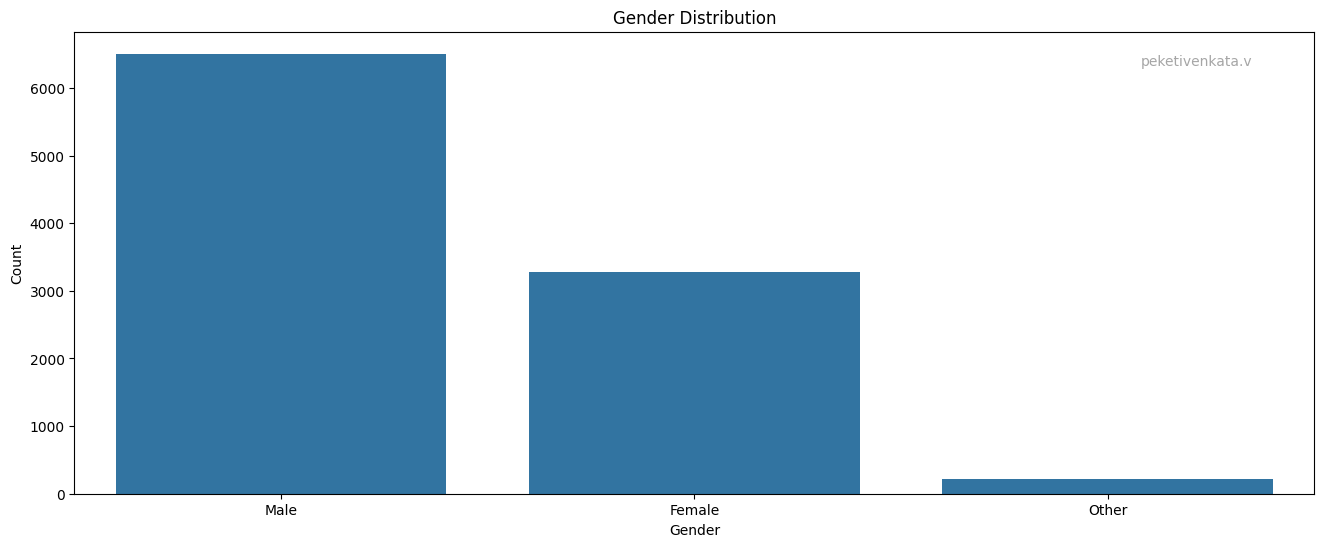

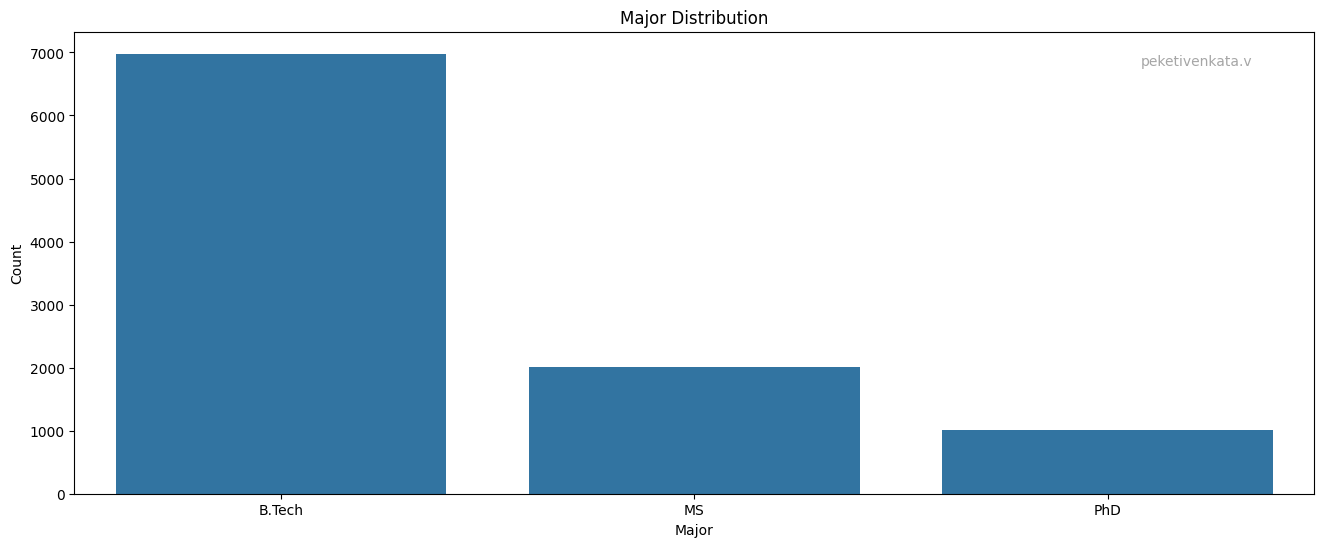

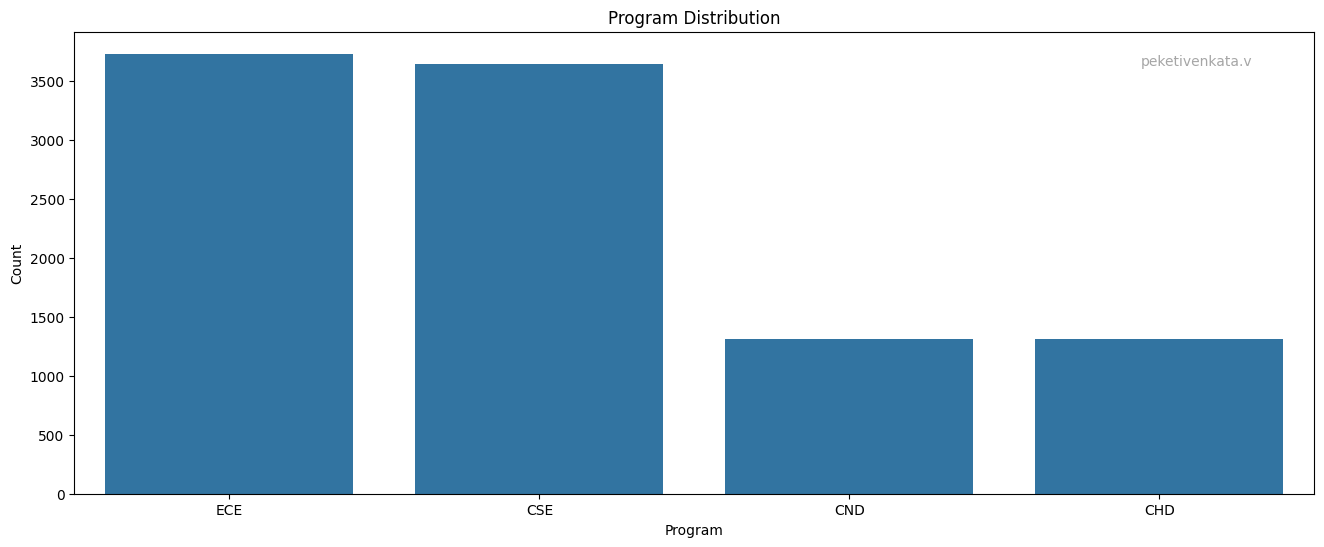

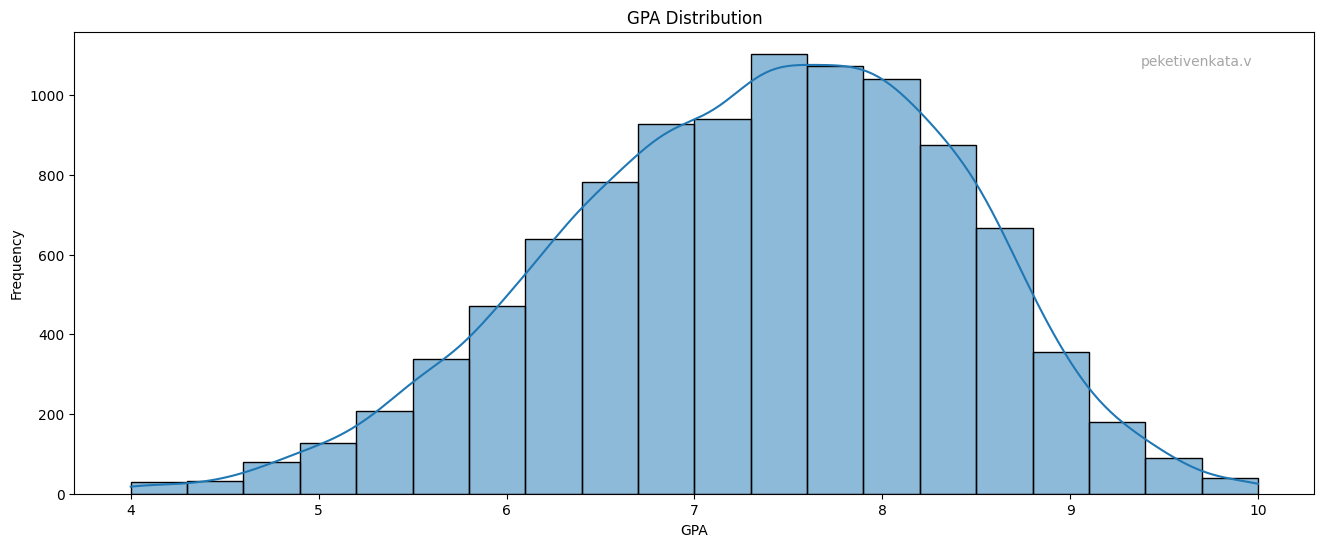

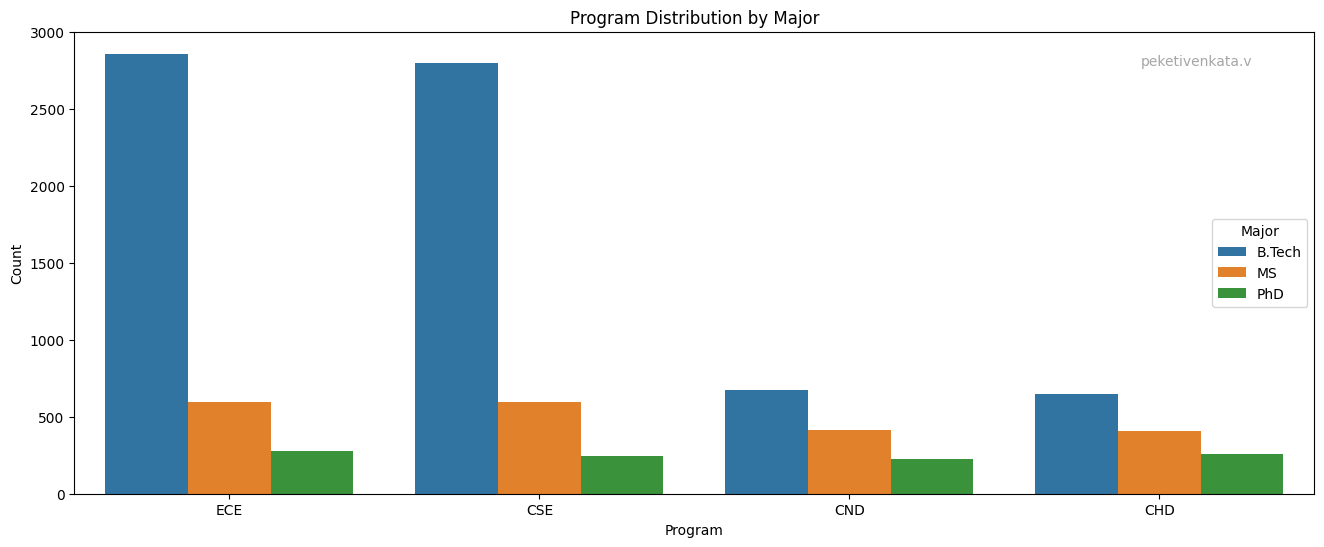

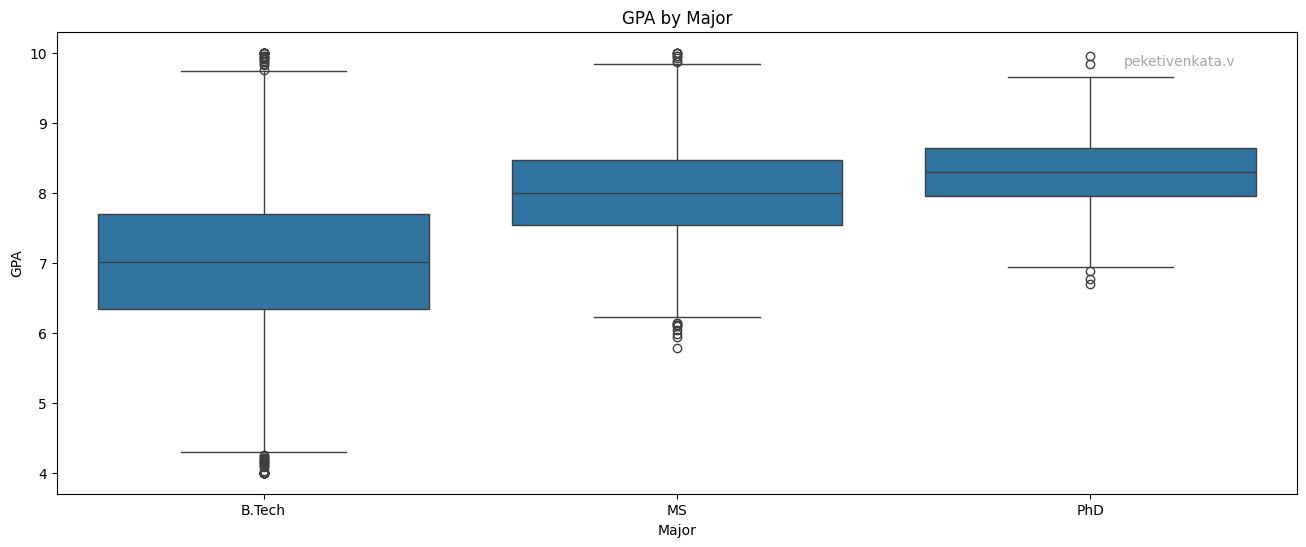

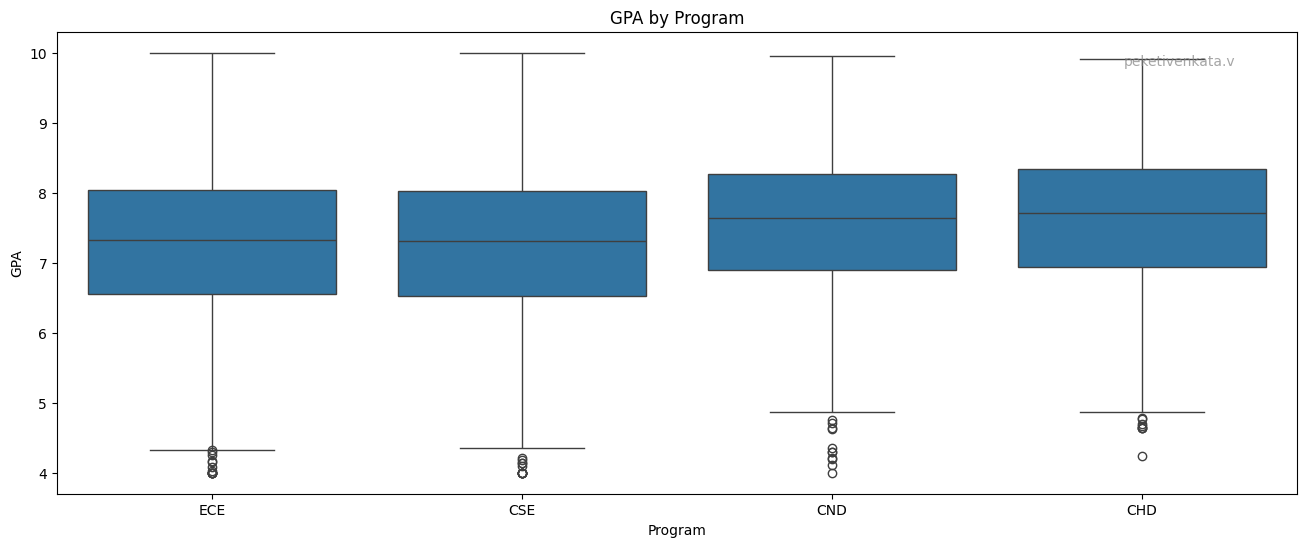

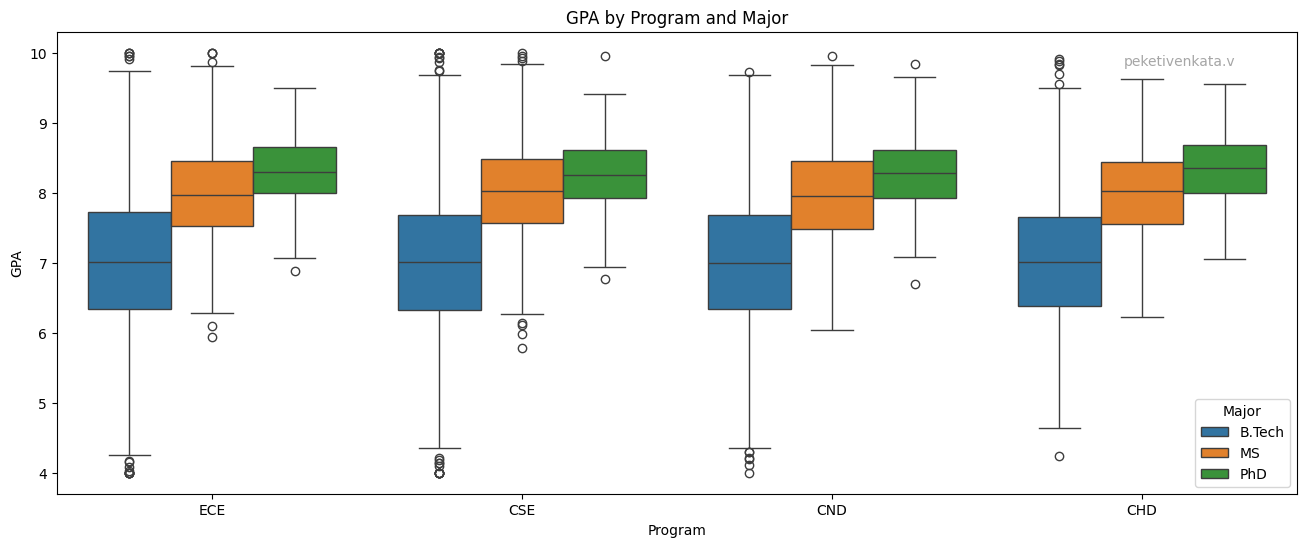

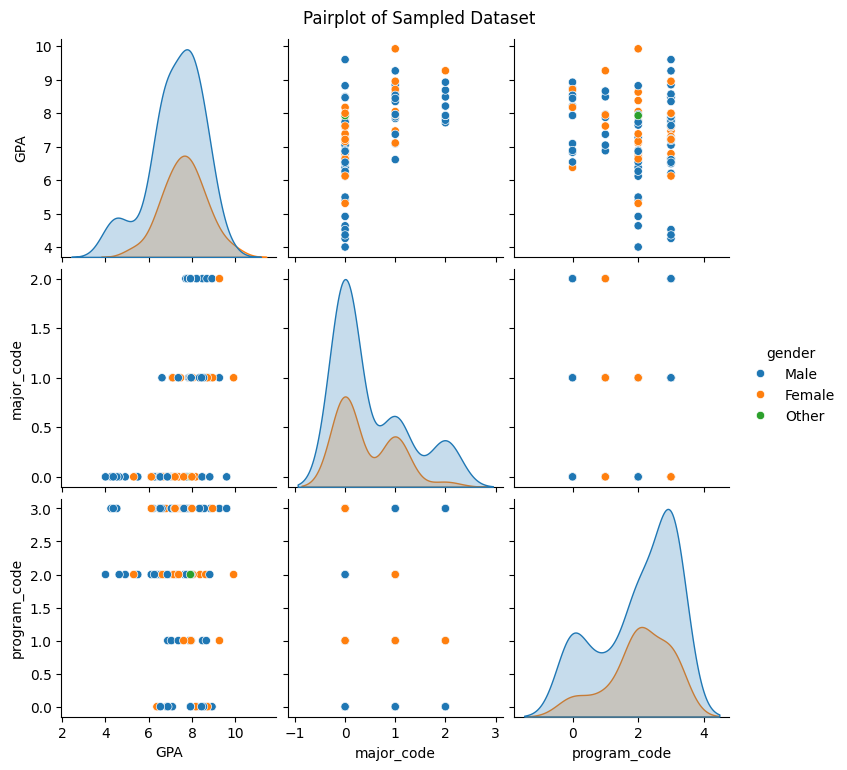

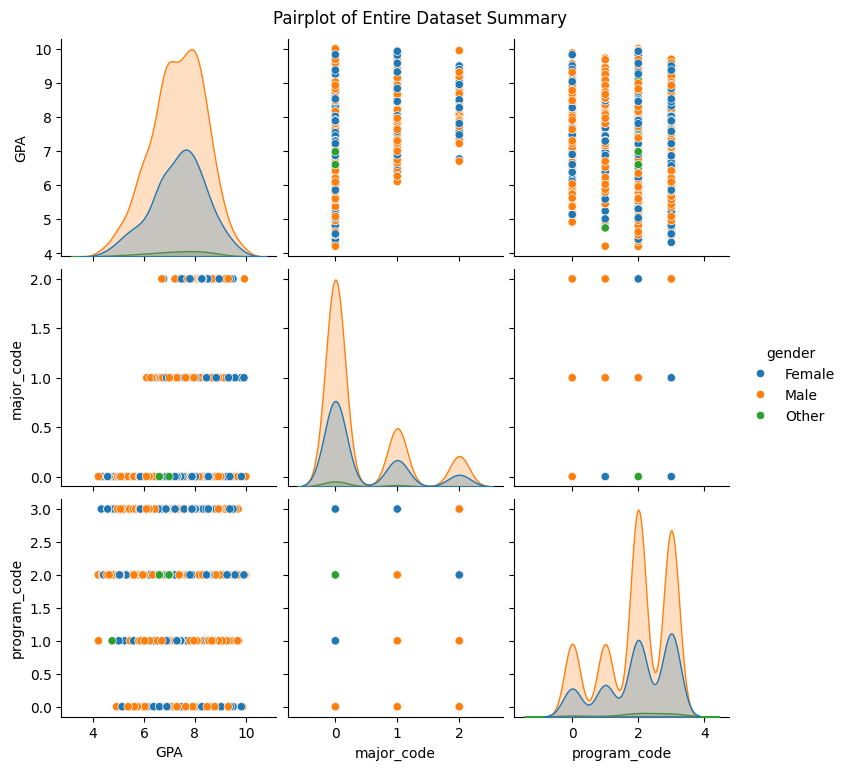

In [66]:
dataset.plot_gender_distribution()
dataset.plot_major_distribution()
dataset.plot_program_distribution()
dataset.plot_gpa_distribution()
dataset.plot_program_by_major() 
dataset.plot_gpa_by_major()
dataset.plot_gpa_by_program()
dataset.plot_gpa_by_program_and_major()
dataset.plot_sampled_dataset(sample_size=100)
dataset.plot_entire_dataset_summary()

#### (b) GPA Summary Statistics

In [67]:
mean, std = dataset.gpa_mean_std()
print("GPA Mean:", mean)
print("GPA Std:", std)

GPA Mean: 7.340088949362337
GPA Std: 1.0469271531420088


Because B.Tech dominates (70%), the overall GPA distribution skews towards the B.Tech mean (7). However, the presence of higher GPA MS and PhD students pulls the overall mean up from 7.0 to 7.34.

B.Tech GPAs are spread around (7.0, 1.0). MS GPAs are around (8.0, 0.7) and PhD GPAs are around (8.3, 0.5) Since the dataset mixes distributions with different means, the overall variance is naturally higher and it makes sense.


#### (c) Program-Major Combinations

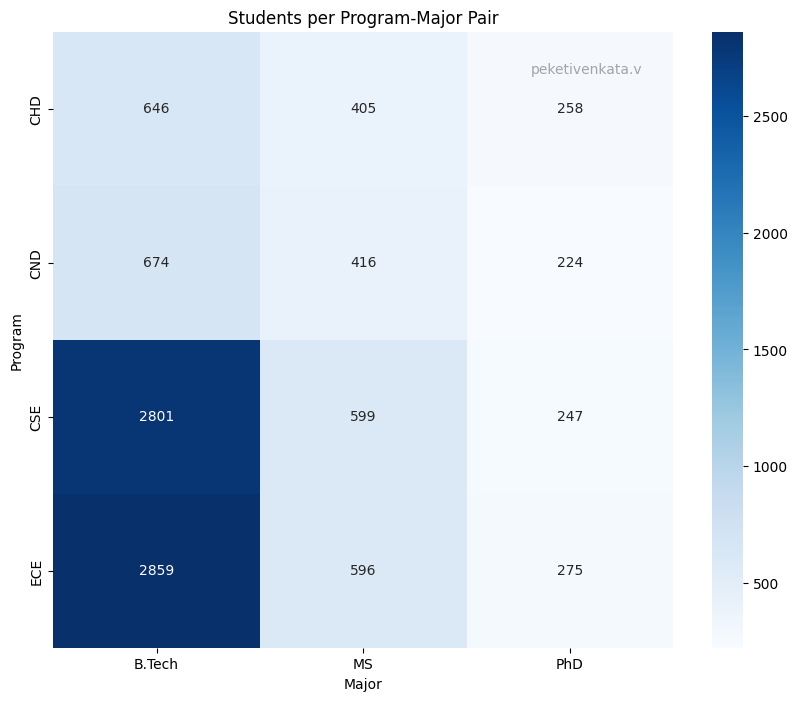

Program-Major Counts:
 major    B.Tech   MS  PhD
program                  
CHD         646  405  258
CND         674  416  224
CSE        2801  599  247
ECE        2859  596  275


In [68]:
counts = dataset.count_students_per_program_major_pair()
dataset.visualize_students_per_program_major_pair(counts)
print("Program-Major Counts:\n", counts)

We can see that majority of the students belong to (Btech, CSE) and (Btech, ECE) and the least number of people belong to (PhD, CND) and (PhD, CHD). This makes sense because of the programs are conditioned of major and Btech has the highest Major proportion of all students (70%) and CSE and ECE has the highest program proportion i.e 40% each.

In [69]:
print("Simple Random Sampling:")
random_mean, random_std_mean = dataset.get_gpa_mean_std_random(n=500, repeats=50)
print(f"  Mean of GPA estimates: {random_mean:.4f}")
print(f"  Mean of std estimates: {random_std_mean:.4f}")

print("\nStratified Sampling by Major:")
stratified_mean, stratified_std_mean = dataset.get_gpa_mean_std_stratified(n=500, repeats=50)
print(f"  Mean of GPA estimates: {stratified_mean:.4f}")
print(f"  Mean of std estimates: {stratified_std_mean:.4f}")

Simple Random Sampling:
  Mean of GPA estimates: 7.3366
  Mean of std estimates: 0.0478

Stratified Sampling by Major:
  Mean of GPA estimates: 7.3322
  Mean of std estimates: 0.0351


In simple random sampling, random samples may over or under represent certain majors, which adds extra variability to the GPA estimate.

Stratified sampling forces each major to be represented in proportion to its actual population size. This eliminates fluctuations due to uneven representation of the data and ensures that variability comes only from within majors (which is smaller), not from between major differences.

Since majors likely have different average GPAs, ensuring proportional representation reduces the sampling error.

### Q1.3 Gender Balanced Cohort

In [70]:
counts_gender_balanced = dataset.get_gender_balanced_counts(n=300, repeats=5)
print("Gender count for 'exact same count across genders':")
print(counts_gender_balanced)


Gender count for 'exact same count across genders':
[{'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}]


In [71]:
counts_sampling_strategy_A= dataset.sample_gender_uniform_random(n=300, repeats=5)
print("Gender count for Sampling Strategy A:")
print(counts_sampling_strategy_A)


Gender count for Sampling Strategy A:
[{'Male': 97, 'Female': 106, 'Other': 97}, {'Male': 78, 'Female': 118, 'Other': 104}, {'Male': 87, 'Female': 107, 'Other': 106}, {'Male': 91, 'Female': 103, 'Other': 106}, {'Male': 104, 'Female': 92, 'Other': 104}]


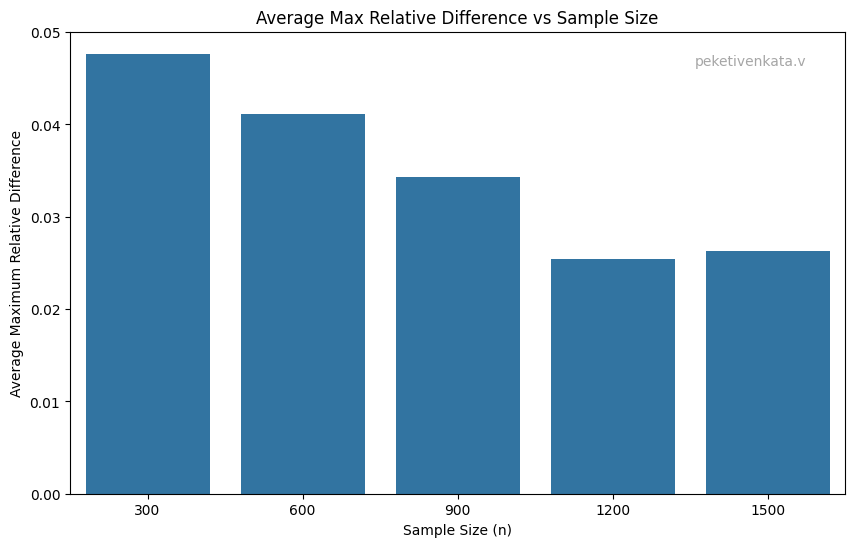

In [72]:
sample_size = [300, 600, 900, 1200, 1500]
avg_rel_diffs = []

for n in sample_size:
    counts = dataset.sample_gender_uniform_random(n = n, repeats=10)

    rel_diffs = [
        (max(c.values()) - min(c.values())) / n for c in counts
    ]

    avg_rel_diffs.append(np.mean(rel_diffs))

dataframe = pd.DataFrame({
    "Sample Size": sample_size,
    "Avg Relative Difference": avg_rel_diffs
})

plt.figure(figsize=(10, 6))
sns.barplot(data=dataframe, x="Sample Size", y="Avg Relative Difference")
plt.title("Average Max Relative Difference vs Sample Size")
plt.text(
            0.95, 0.95, "peketivenkata.v",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
plt.xlabel("Sample Size (n)")
plt.ylabel("Average Maximum Relative Difference")
plt.show()


    

#### Q1.4 GPA-Uniform Cohort

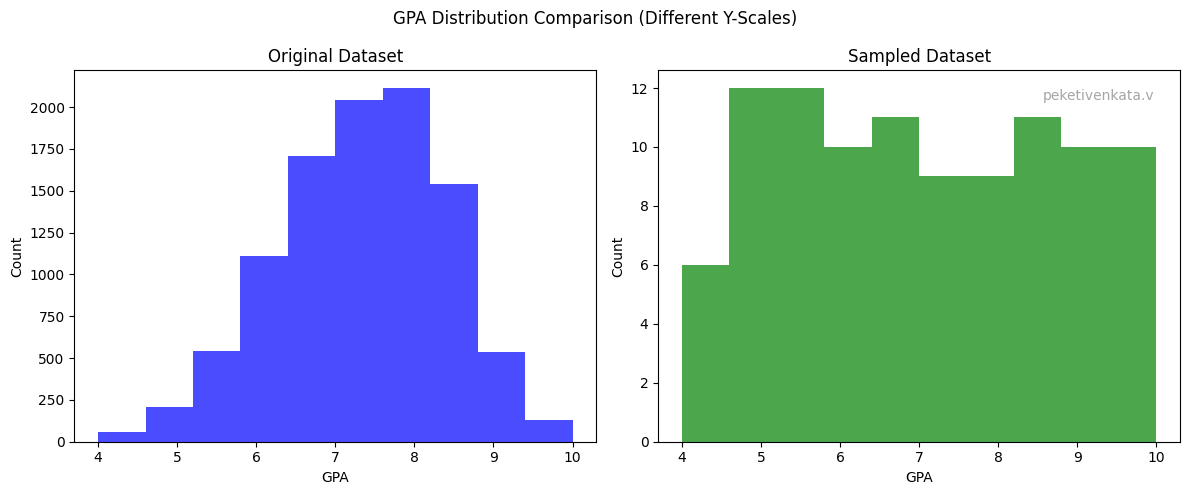

In [73]:
sampled_by_gpa_df = dataset.sample_gpa_uniform(n=100, bins=10)
dataset.plot_gpa_histogram_comparison(sampled_by_gpa_df)

I sampled with replacement. In the function I randomly pick one student from the chosen bin the selected student is not removed. This means the same student can be picked again in later iterations. This makes sense because the goal is to make the GPA distribution approximately uniform across bins, not to ensure unique students. Some bins may have very few students, and without replacement we might quickly run out of students in those bins, making uniform sampling not possible.

#### Q1.5 Program-Major Balanced Cohort

Program-Major Counts:
major    B.Tech  MS  PhD
program                 
CHD           7   2    2
CND           7   2    5
CSE           4   3    7
ECE           8   6    7


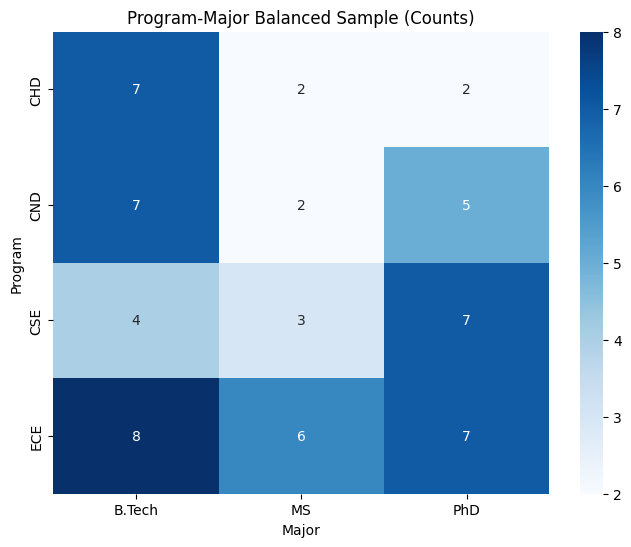

In [74]:
sampled_by_program_major_df = dataset.sample_program_major_balanced(n=60)
dataset.show_program_major_counts_and_heatmap(sampled_by_program_major_df)

In my case there were enough students in every (program, major) combination. We can see from the heatmap from Q 1.1 (c). Even the smallest group has more than 250 members in my case and since we are sampling only 60 students here, it is not a problem. This can be an issue if there are less number of students in any group than the number of students we are sampling. Therefore for the code to be robust and to work with any kind of data I have ensure sampling with replacement which ensures that even small groups can be repeatedly sampled without running out of students. (Although it is not required in my case)